# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
from prophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

# Loading Dataset

In [ ]:
data = pd.read_csv("C:/Users/vishn/Downloads/Electric_Consumption_And_Cost__2010_-_Feb_2023__20240425.csv", low_memory=False)

# Checking Few Records

In [ ]:
data.head()

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,15396.82,GOV/NYC/068,Yes,128800.0,7387.97,216.0,2808.0,5200.85
1,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14556.34,GOV/NYC/068,Yes,115200.0,6607.87,224.0,2912.0,5036.47
2,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13904.98,GOV/NYC/068,Yes,103200.0,5919.55,216.0,2808.0,5177.43
3,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14764.04,GOV/NYC/068,Yes,105600.0,6057.22,208.0,2704.0,6002.82
4,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13729.54,GOV/NYC/068,Yes,97600.0,5598.34,216.0,2808.0,5323.20


# Descriptive Statistics

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447849 entries, 0 to 447848
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Development Name    446368 non-null  object 
 1   Borough             447849 non-null  object 
 2   Account Name        447849 non-null  object 
 3   Location            436128 non-null  object 
 4   Meter AMR           447622 non-null  object 
 5   Meter Scope         23867 non-null   object 
 6   TDS #               445111 non-null  float64
 7   EDP                 447849 non-null  int64  
 8   RC Code             447849 non-null  object 
 9   Funding Source      447849 non-null  object 
 10  AMP #               445962 non-null  object 
 11  Vendor Name         447849 non-null  object 
 12  UMIS BILL ID        447849 non-null  int64  
 13  Revenue Month       447849 non-null  object 
 14  Service Start Date  447841 non-null  object 
 15  Service End Date    447841 non-nul

In [ ]:
data['Revenue Month'] = pd.to_datetime(data['Revenue Month'])
data['Consumption (KWH)'] = pd.to_numeric(data['Consumption (KWH)'], errors='coerce')

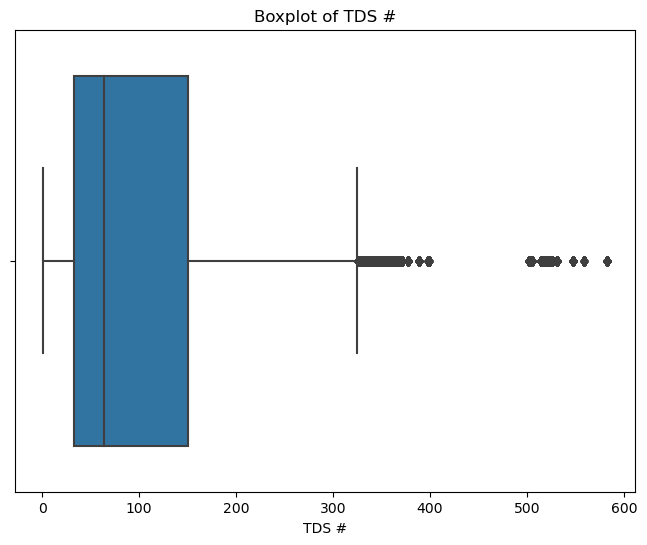

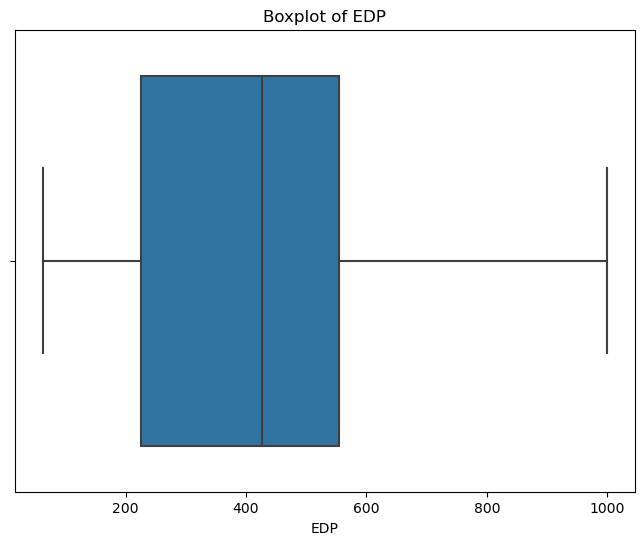

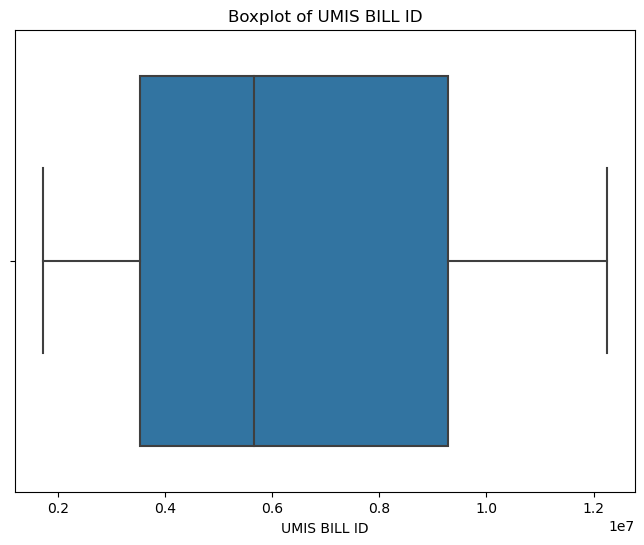

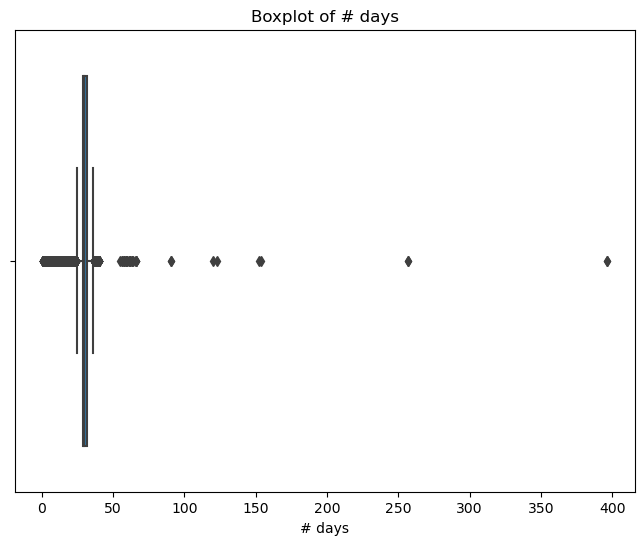

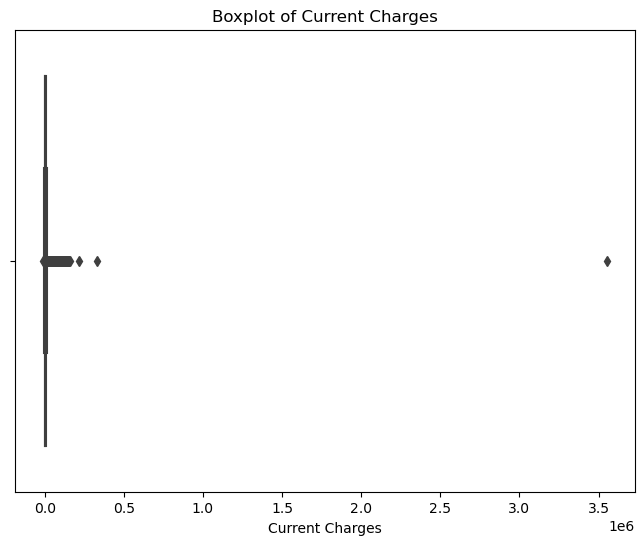

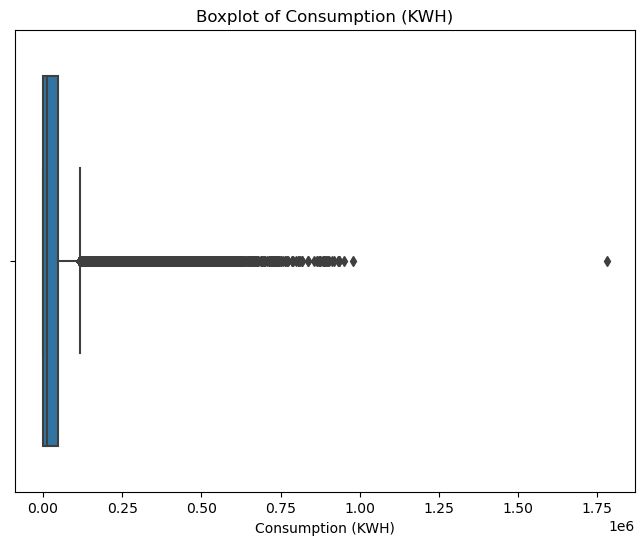

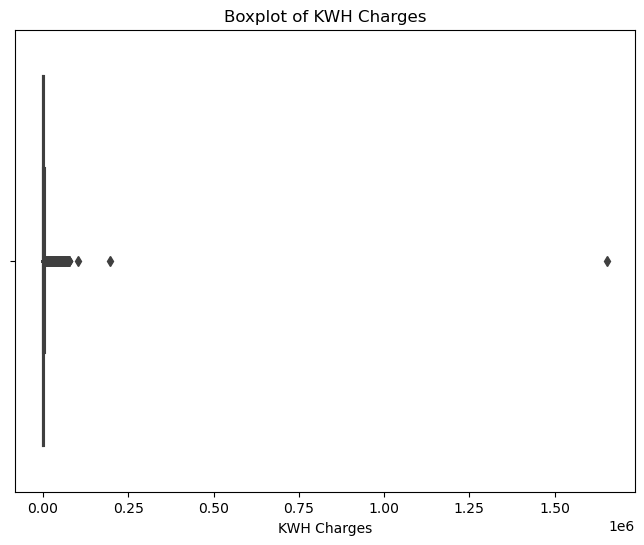

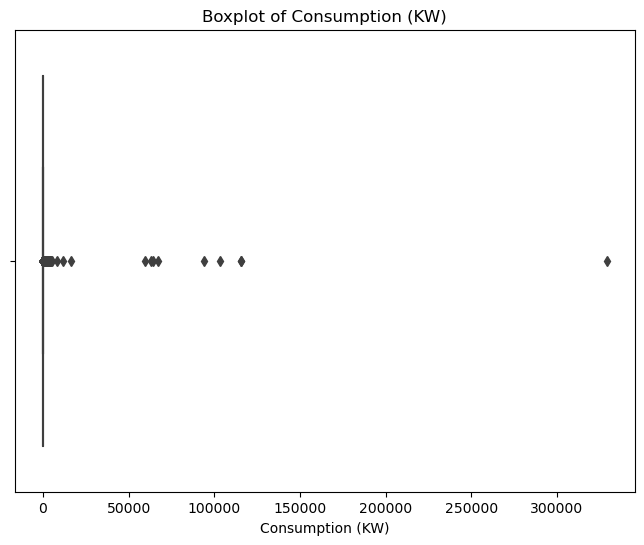

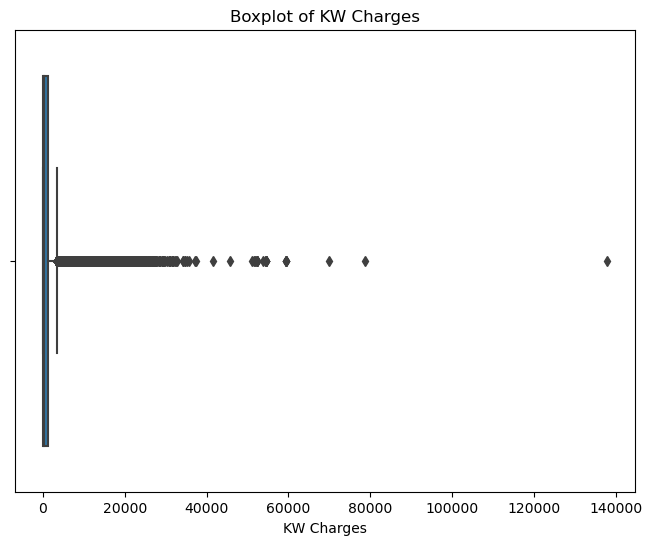

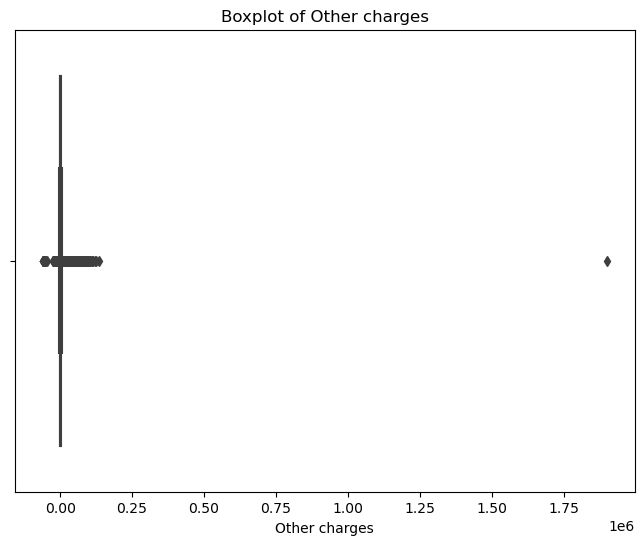

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def detect_outliers(df, columns):
  for col in columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
detect_outliers(data, numerical_columns)

In [ ]:
def remove_outliers(df, columns):
  for col in columns:
    # Calculate the interquartile range (IQR)
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1

    # Define the lower and upper bounds
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    # Filter the DataFrame to exclude outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

  return df
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data = remove_outliers(data, numerical_columns)

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data.head()

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118.0,248,B011800,FEDERAL,...,7518362,N,10457.15,GOV/NYC/068,Yes,74400.0,4267.58,168.0,2184.0,4005.57
1,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118.0,248,B011800,FEDERAL,...,7518362,N,10277.70,GOV/NYC/068,Yes,74000.0,4244.64,144.0,1872.0,4161.06
2,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118.0,248,B011800,FEDERAL,...,7518362,N,10481.32,GOV/NYC/068,Yes,70000.0,4015.20,172.0,2236.0,4230.12
3,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118.0,248,B011800,FEDERAL,...,7518362,N,11713.48,GOV/NYC/068,Yes,78000.0,4474.08,184.0,2392.0,4847.40
4,ADAMS,BRONX,ADAMS,BLD 07,NONE,BLD 07,118.0,248,B011800,FEDERAL,...,7515778,N,10034.35,GOV/NYC/068,Yes,74400.0,4267.58,156.0,2028.0,3738.77


In [ ]:
# Aggregate data for daily consumption - using 'Service End Date' as the date
daily_data = data.groupby('Revenue Month')['Consumption (KWH)'].sum().reset_index()
daily_data.columns = ['Date', 'Daily Consumption']

# Aggregate data for monthly mean consumption
monthly_data = data.groupby(data['Revenue Month'].dt.to_period('M'))['Consumption (KWH)'].mean().reset_index()
monthly_data['Revenue Month'] = monthly_data['Revenue Month'].dt.to_timestamp()
monthly_data.columns = ['Date', 'Monthly Mean Consumption']

# Aggregate data for yearly mean consumption
yearly_data = data.groupby(data['Revenue Month'].dt.to_period('Y'))['Consumption (KWH)'].mean().reset_index()
yearly_data['Revenue Month'] = yearly_data['Revenue Month'].dt.to_timestamp()
yearly_data.columns = ['Date', 'Yearly Mean Consumption']

# Display the head of each dataset
daily_data.head(), monthly_data.head(), yearly_data.head()


(        Date  Daily Consumption
 0 2010-01-01         54205537.0
 1 2010-02-01         53395193.0
 2 2010-03-01         52971212.0
 3 2010-04-01         54019162.0
 4 2010-05-01         54533614.0,
         Date  Monthly Mean Consumption
 0 2010-01-01              33072.322758
 1 2010-02-01              29763.206800
 2 2010-03-01              28930.208629
 3 2010-04-01              29278.678591
 4 2010-05-01              29670.083787,
         Date  Yearly Mean Consumption
 0 2010-01-01             30460.547121
 1 2012-01-01             22695.743087
 2 2013-01-01             20539.124600
 3 2014-01-01             19886.027966
 4 2015-01-01             21730.711432)

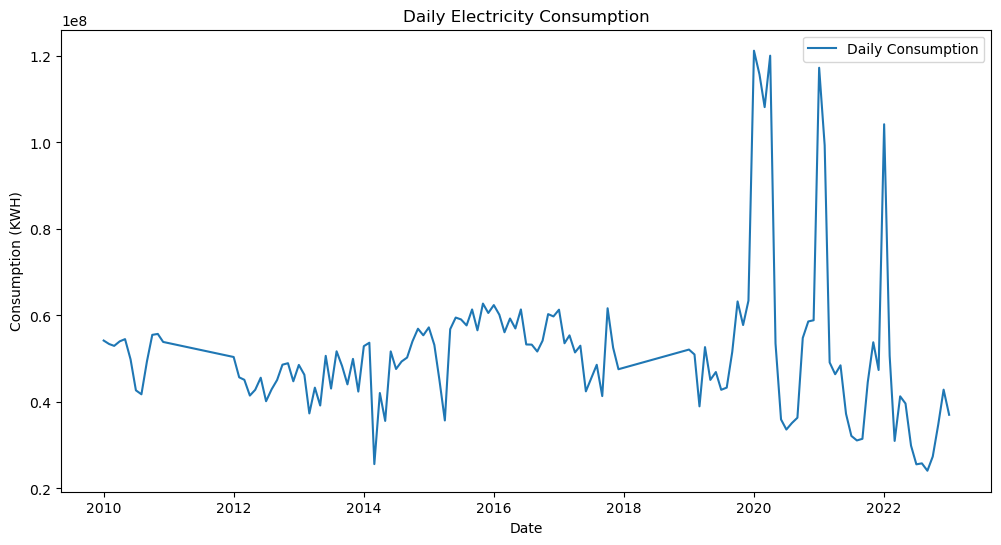

In [ ]:
# Plot daily consumption
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Date'], daily_data['Daily Consumption'], label='Daily Consumption')
plt.title('Daily Electricity Consumption')
plt.xlabel('Date')
plt.ylabel('Consumption (KWH)')
plt.legend()
plt.show()

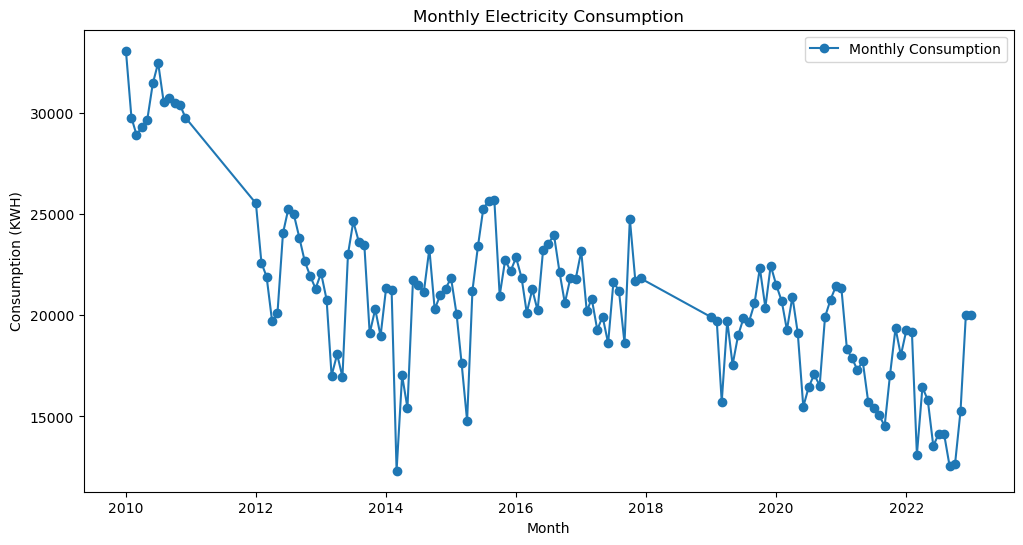

In [ ]:
# Plot monthly consumption
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Date'], monthly_data['Monthly Mean Consumption'], label='Monthly Consumption', marker='o')
plt.title('Monthly Electricity Consumption')
plt.xlabel('Month')
plt.ylabel('Consumption (KWH)')
plt.legend()
plt.show()

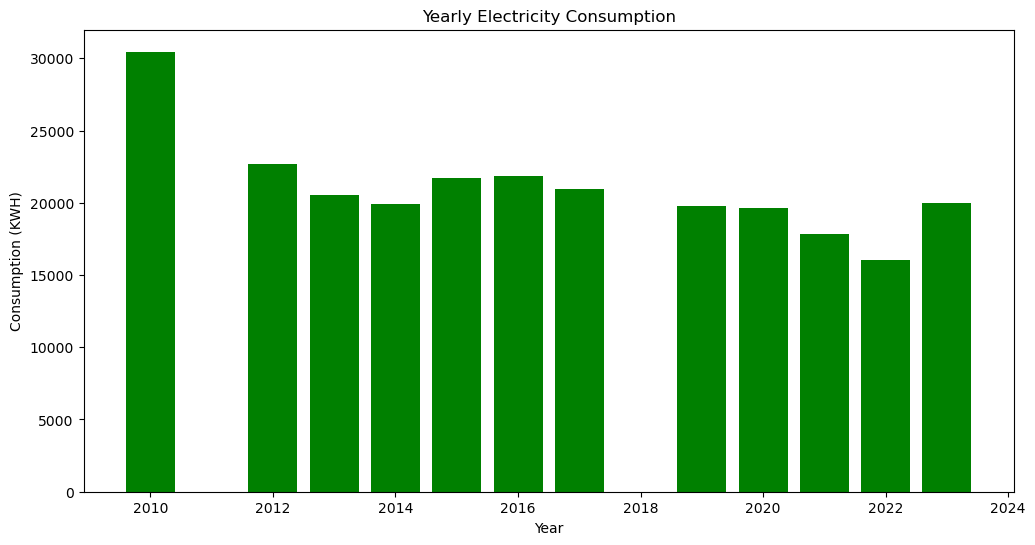

In [ ]:
# Plot yearly consumption
plt.figure(figsize=(12, 6))
plt.bar(yearly_data['Date'].dt.year, yearly_data['Yearly Mean Consumption'], color='green')
plt.title('Yearly Electricity Consumption')
plt.xlabel('Year')
plt.ylabel('Consumption (KWH)')
plt.show()

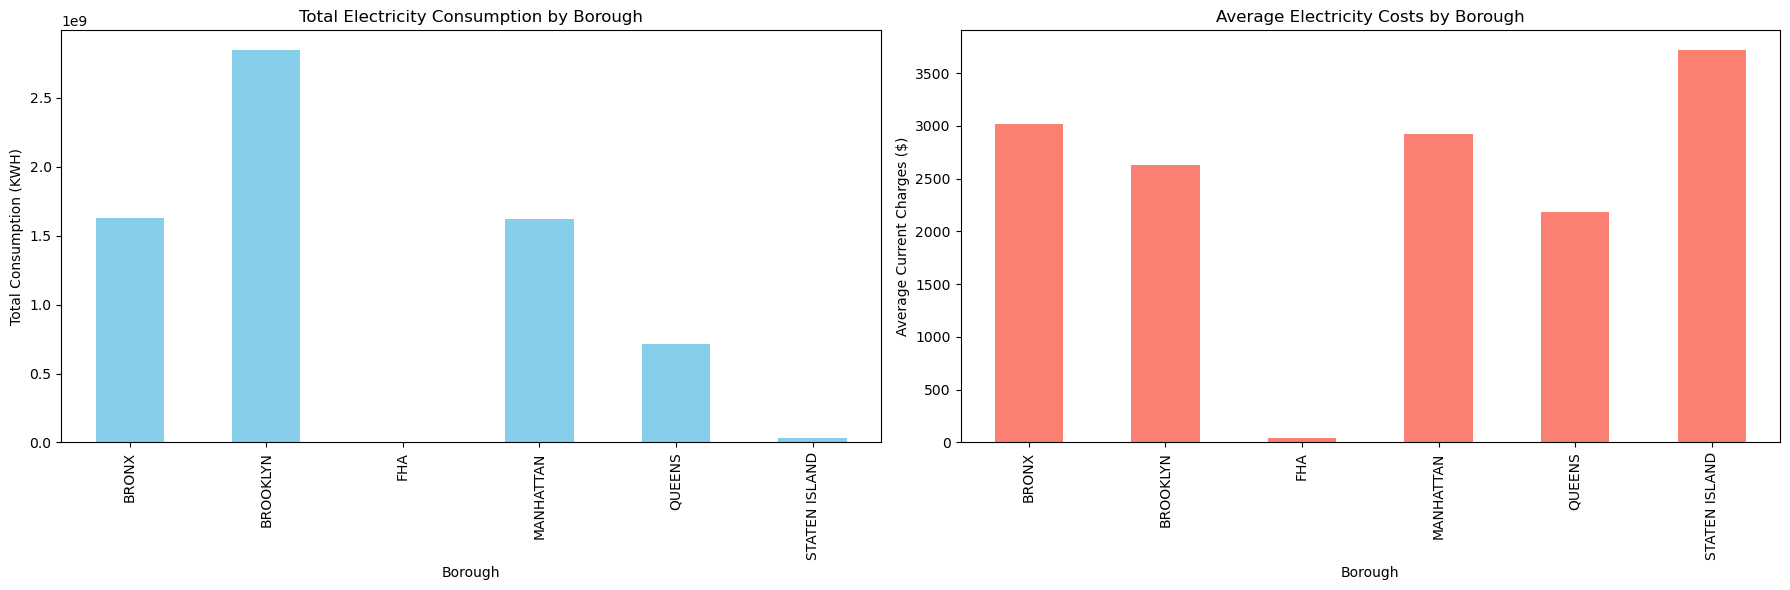

In [ ]:
# Group data by borough for total consumption and average cost
borough_data = data.groupby('Borough').agg({
    'Consumption (KWH)': 'sum',
    'Current Charges': 'mean'
})

# Create bar plots for total consumption and average costs by borough
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot total consumption by borough
borough_data['Consumption (KWH)'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Total Electricity Consumption by Borough')
ax1.set_ylabel('Total Consumption (KWH)')
ax1.set_xlabel('Borough')

# Plot average costs by borough
borough_data['Current Charges'].plot(kind='bar', ax=ax2, color='salmon')
ax2.set_title('Average Electricity Costs by Borough')
ax2.set_ylabel('Average Current Charges ($)')
ax2.set_xlabel('Borough')

plt.tight_layout()
plt.show()


In [ ]:
def calculate_mape(y_true, y_pred):
    """ Calculate MAPE avoiding division by zero """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

def detect_time_unit_and_forecast(data, tuned_model, growth_type='linear', cap=None):
    data_sorted = data.sort_values(by='Date').reset_index(drop=True)
    date_diffs = data_sorted['Date'].diff().dt.days.dropna()
    mode_diff = date_diffs.mode()[0]

    if mode_diff <= 2:
        unit = 'days'
        periods = [100, 200, 365]
        freq = 'D'
    elif 28 <= mode_diff <= 31:
        unit = 'months'
        periods = [1, 6, 9]
        freq = 'M'
    elif mode_diff >= 365:
        unit = 'years'
        periods = [1, 10, 20]
        freq = 'Y'
    else:
        raise ValueError("Unable to determine the time unit of the series")

    if growth_type == 'logistic' and cap is not None:
        data_sorted['cap'] = cap


    df = data_sorted.rename(columns={'Date': 'ds', data_sorted.columns[1]: 'y'})
    model = tuned_model
    for column in data.columns:
        if column.startswith('Borough_') or column.startswith('Rate_Class_') or column.startswith('Meter_Scope_') or column.startswith('Estimated_'):
            model.add_regressor(column)
    model.fit(df)

    forecasts = {}
    for period in periods:
        future = model.make_future_dataframe(periods=period, freq=freq)
        if growth_type == 'logistic' and cap is not None:
            future['cap'] = cap
        forecast = model.predict(future)

        # Plotting
        plt.figure(figsize=(12, 6))
        plt.plot(df['ds'], df['y'], label='Historical Data')
        plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
        plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.3)
        plt.title(f'Electric Consumption Forecast for {period} {unit}')
        plt.xlabel('Date')
        plt.ylabel('Electric Consumption')
        plt.legend()
        plt.show()

        # Ensuring the forecast period matches the historical data for comparison
        forecast_period = forecast.loc[forecast['ds'] > df['ds'].max()]
        actual_period = df[df['ds'] <= forecast['ds'].max()]  # Actual data that overlaps with the forecast

        if len(actual_period) >= period:
            actual = actual_period['y'].tail(period)  # Last 'period' actual values
            predicted = forecast_period['yhat'].head(period)  # First 'period' predicted values

            mae = mean_absolute_error(actual, predicted)
            mape = calculate_mape(actual, predicted)
            r_squared = r2_score(actual, predicted)

            # Print metrics
            print(f"Metrics for {period} {unit} forecast:")
            print(f"MAE: {mae}")
            print(f"MAPE: {mape}%")
            print(f"R²: {r_squared}")
        else:
            print(f"Not enough historical data to calculate metrics for {period} {unit} forecast.")

        forecasts[f'Forecast for {period} {unit}'] = forecast_period[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    return forecasts

12:17:30 - cmdstanpy - INFO - Chain [1] start processing
12:17:30 - cmdstanpy - INFO - Chain [1] done processing
12:17:30 - cmdstanpy - INFO - Chain [1] start processing
12:17:30 - cmdstanpy - INFO - Chain [1] done processing


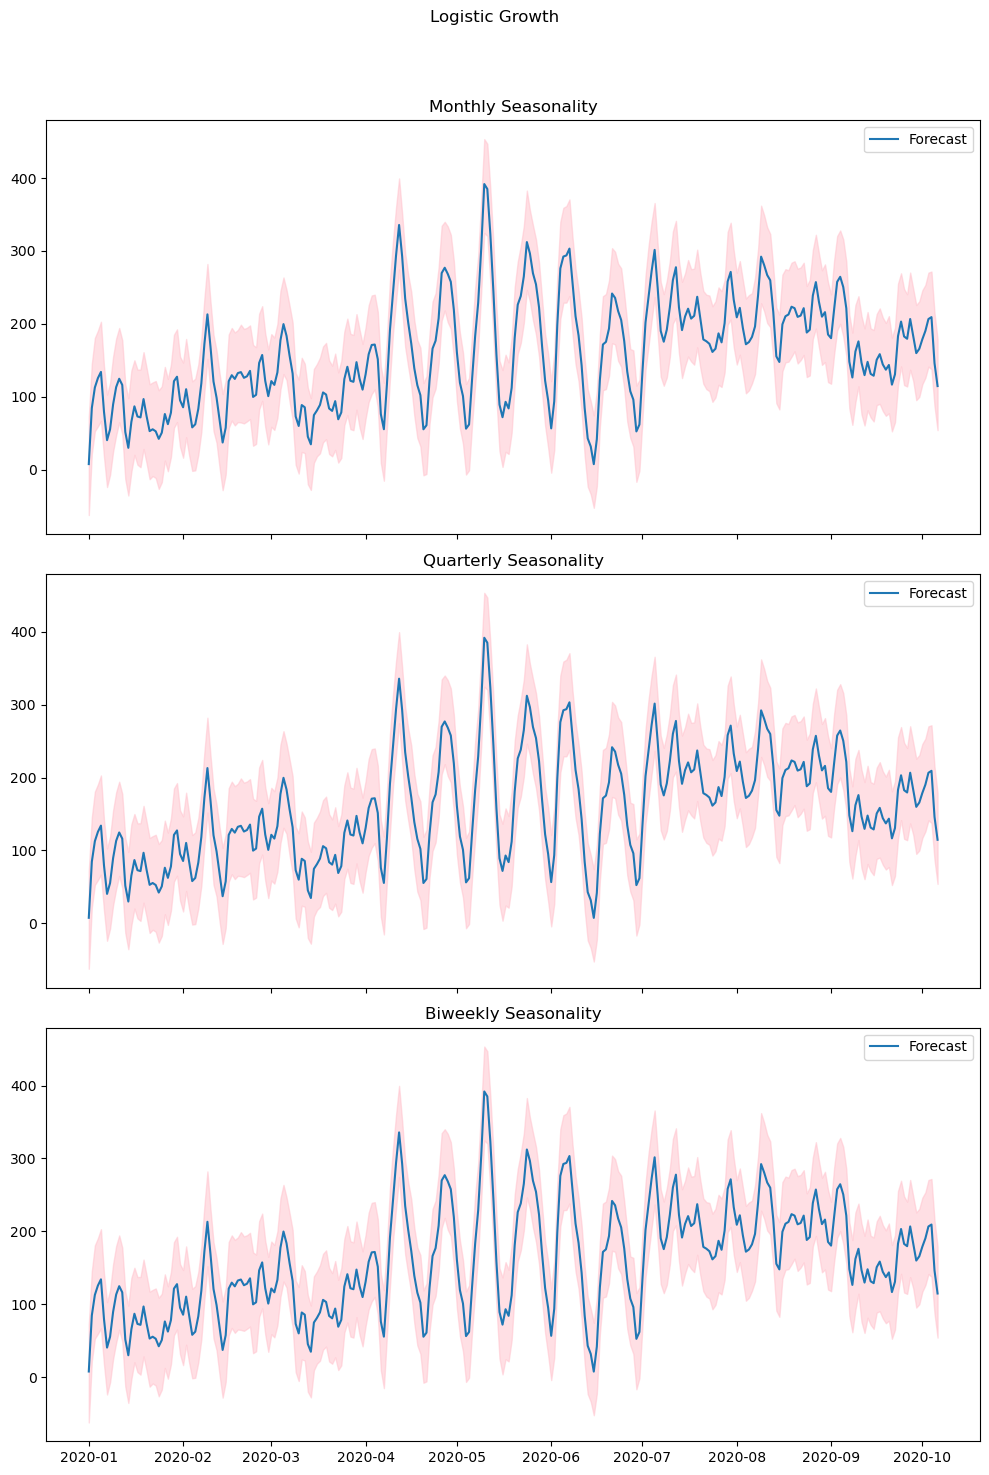

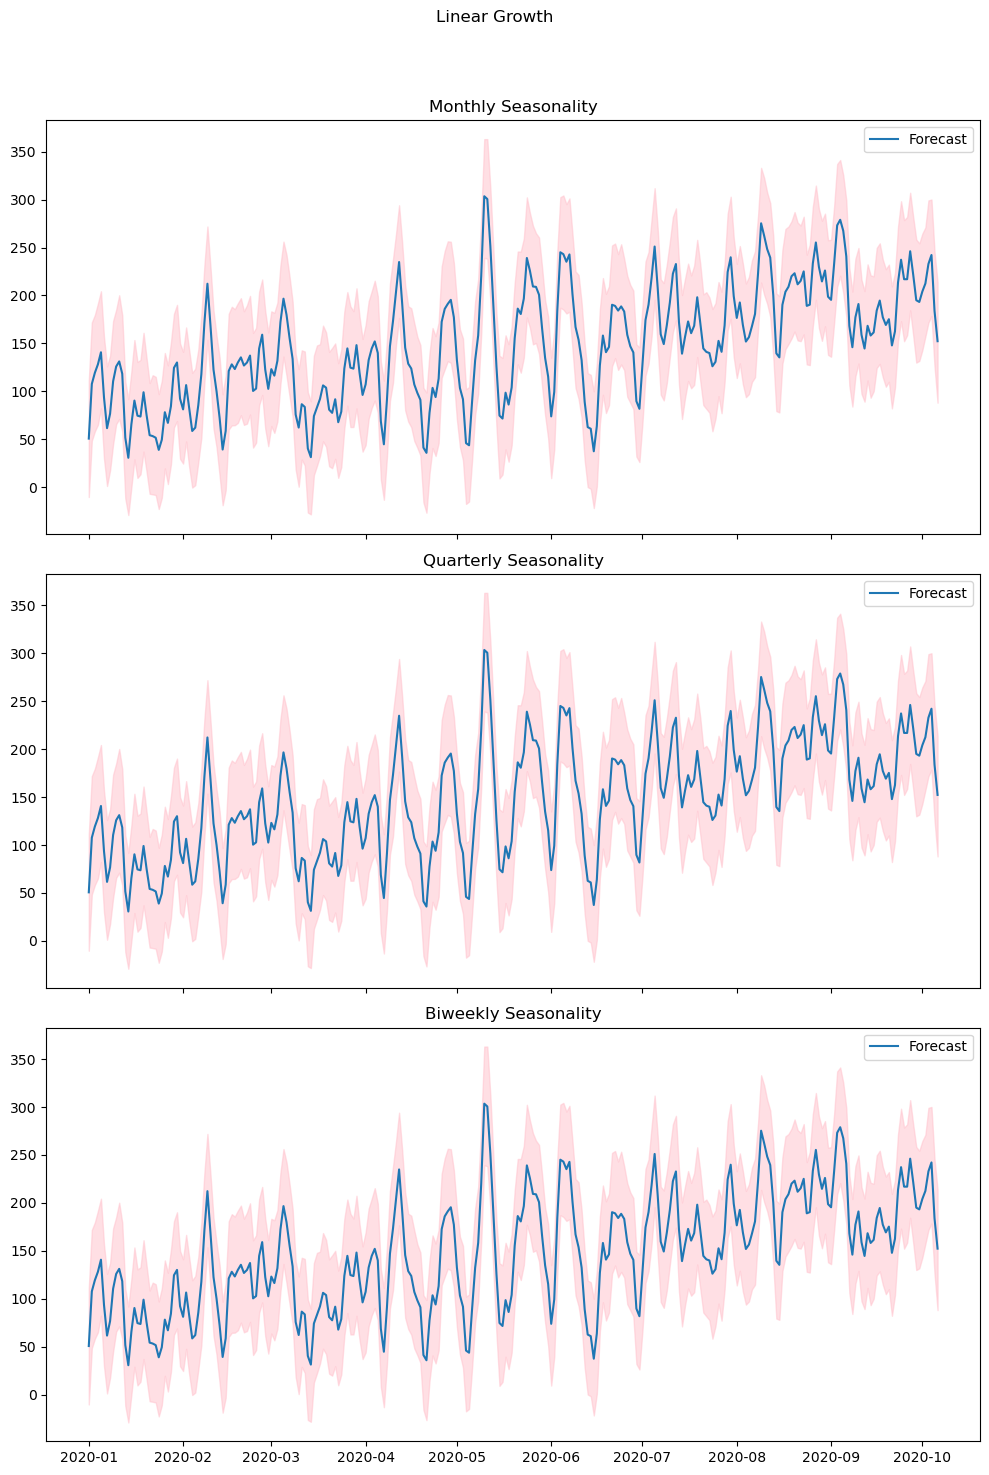

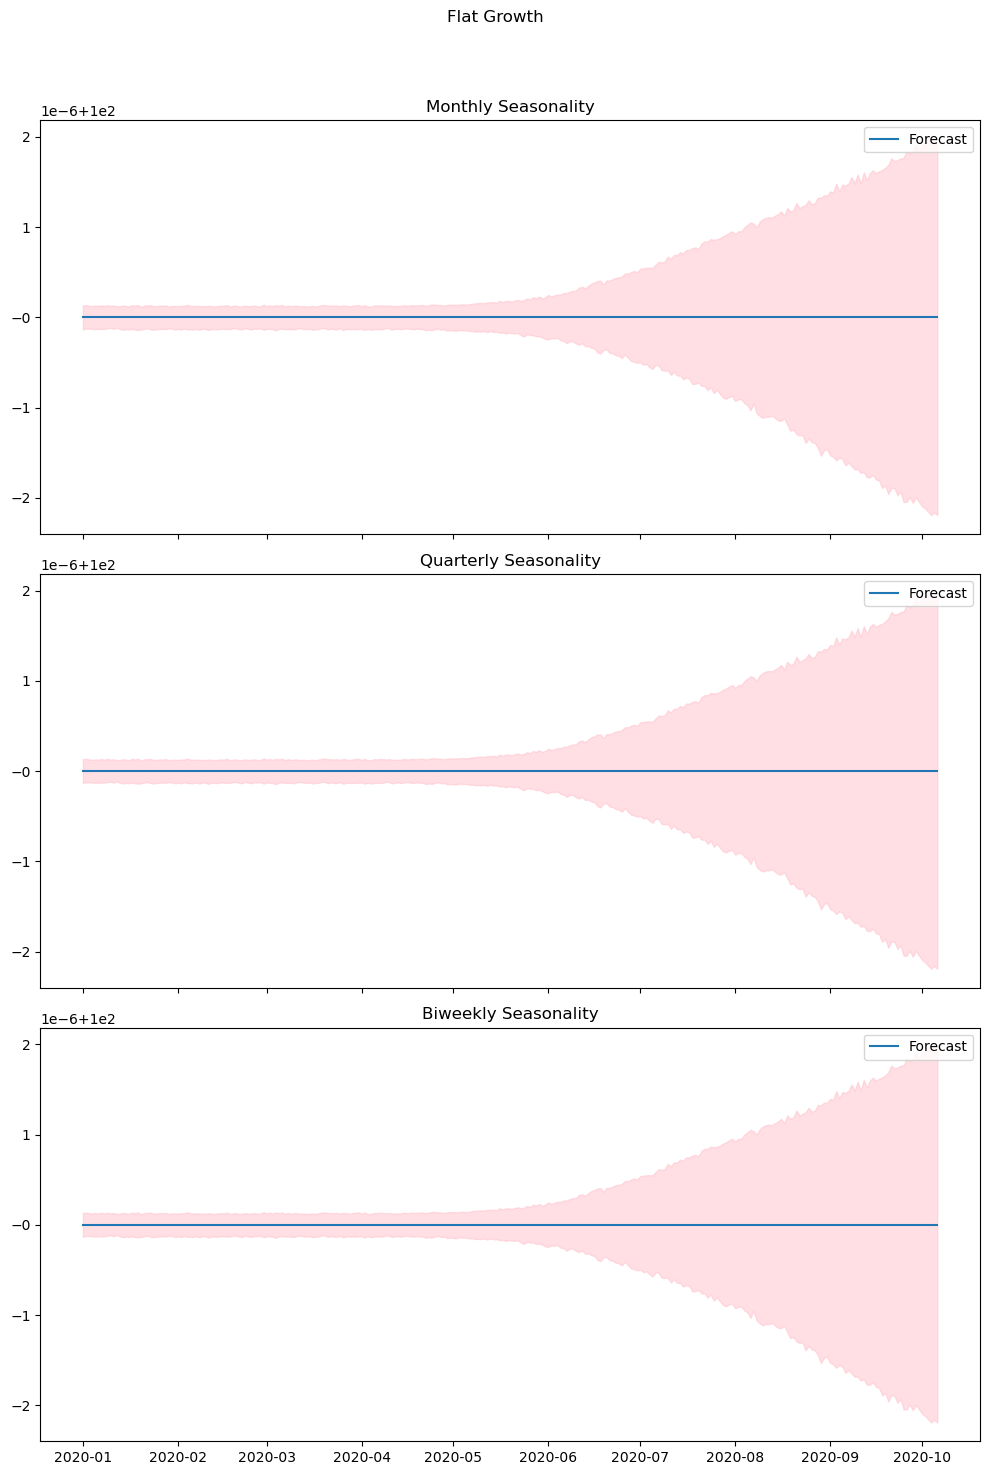

In [ ]:
# Logistic growth data
df_logistic = pd.DataFrame({'ds': dates, 'y': data})
df_logistic['cap'] = 200  # Capacity for logistic growth

# Linear growth data
df_linear = pd.DataFrame({'ds': dates, 'y': data})

# Flat growth data (constant)
df_flat = pd.DataFrame({'ds': dates, 'y': [100] * 100})

# Initialize models
model_logistic = Prophet(growth='logistic', n_changepoints=25, changepoint_prior_scale=0.05)
model_linear = Prophet(growth='linear', n_changepoints=15, changepoint_prior_scale=0.1)
model_flat = Prophet(growth='linear', n_changepoints=0)  # Zero changepoints for flat simulation

# Add custom seasonalities
seasonalities = [
    {'name': 'monthly', 'period': 30.5, 'fourier_order': 5},
    {'name': 'quarterly', 'period': 91.25, 'fourier_order': 10},
    {'name': 'biweekly', 'period': 14, 'fourier_order': 3}
]

for model in [model_logistic, model_linear, model_flat]:
    for seasonality in seasonalities:
        model.add_seasonality(name=seasonality['name'], period=seasonality['period'], fourier_order=seasonality['fourier_order'])

# Fit models
model_logistic.fit(df_logistic)
model_linear.fit(df_linear)
model_flat.fit(df_flat)

# Make future dataframes for 6 months ahead
future_logistic = model_logistic.make_future_dataframe(periods=180)
future_linear = model_linear.make_future_dataframe(periods=180)
future_flat = model_flat.make_future_dataframe(periods=180)

# Set capacity for logistic growth predictions
future_logistic['cap'] = 200

# Predict
forecast_logistic = model_logistic.predict(future_logistic)
forecast_linear = model_linear.predict(future_linear)
forecast_flat = model_flat.predict(future_flat)

# Plot the forecasts for each seasonality and each model
models = [model_logistic, model_linear, model_flat]
forecasts = [forecast_logistic, forecast_linear, forecast_flat]
titles = ['Logistic Growth', 'Linear Growth', 'Flat Growth']

for i, model in enumerate(models):
    fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
    fig.suptitle(titles[i])
    axes[0].plot(forecasts[i]['ds'], forecasts[i]['yhat'], label='Forecast')
    axes[0].fill_between(forecasts[i]['ds'], forecasts[i]['yhat_lower'], forecasts[i]['yhat_upper'], color='pink', alpha=0.5)
    axes[0].set_title('Monthly Seasonality')
    axes[0].legend()

    axes[1].plot(forecasts[i]['ds'], forecasts[i]['yhat'], label='Forecast')
    axes[1].fill_between(forecasts[i]['ds'], forecasts[i]['yhat_lower'], forecasts[i]['yhat_upper'], color='pink', alpha=0.5)
    axes[1].set_title('Quarterly Seasonality')
    axes[1].legend()

    axes[2].plot(forecasts[i]['ds'], forecasts[i]['yhat'], label='Forecast')
    axes[2].fill_between(forecasts[i]['ds'], forecasts[i]['yhat_lower'], forecasts[i]['yhat_upper'], color='pink', alpha=0.5)
    axes[2].set_title('Biweekly Seasonality')
    axes[2].legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

12:53:19 - cmdstanpy - INFO - Chain [1] start processing
12:53:19 - cmdstanpy - INFO - Chain [1] done processing


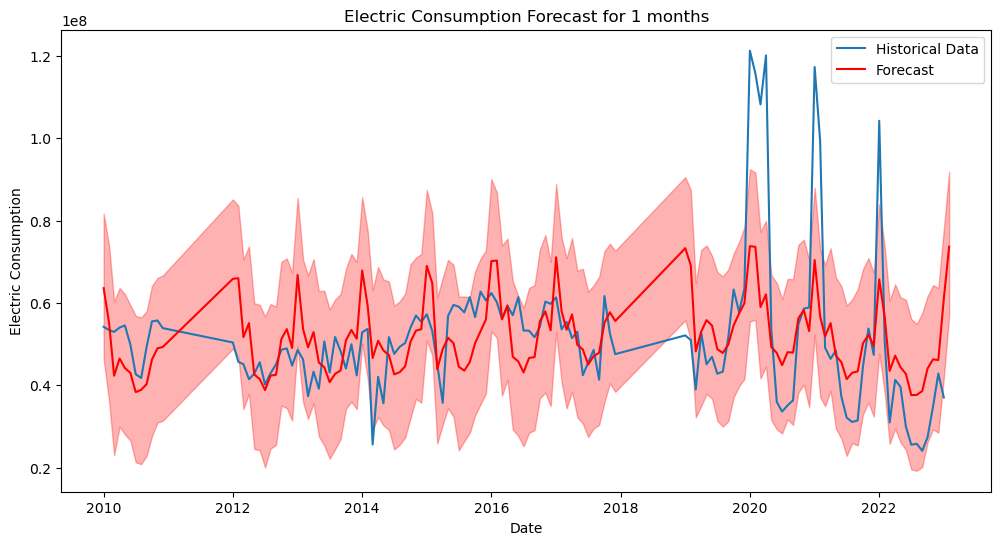

C:\Users\vishn\anaconda3\New folder\23\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Metrics for 1 months forecast:
MAE: 36614444.74128793
MAPE: 98.8528354489833%
R²: nan


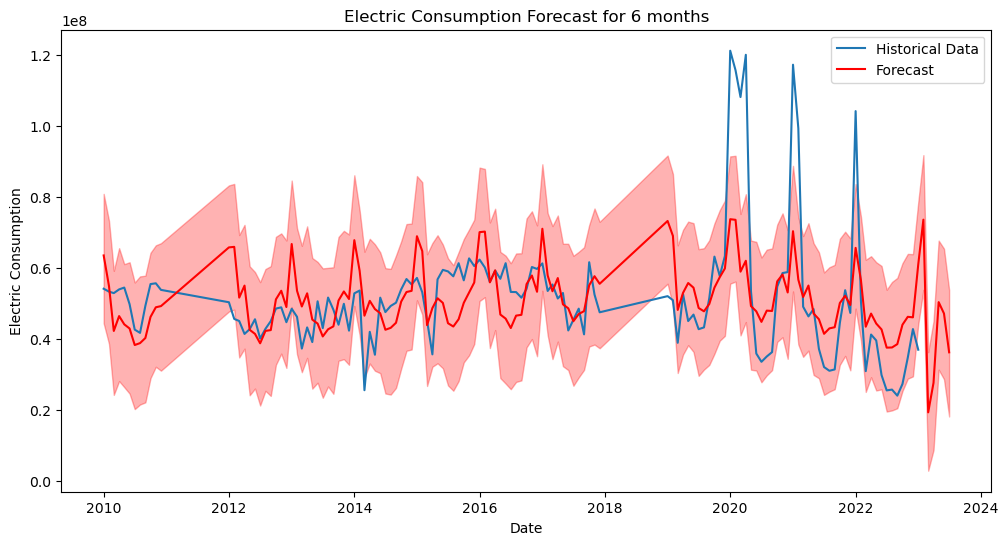

Metrics for 6 months forecast:
MAE: 12268232.052104713
MAPE: 43.85955258458027%
R²: -8.433099441037925


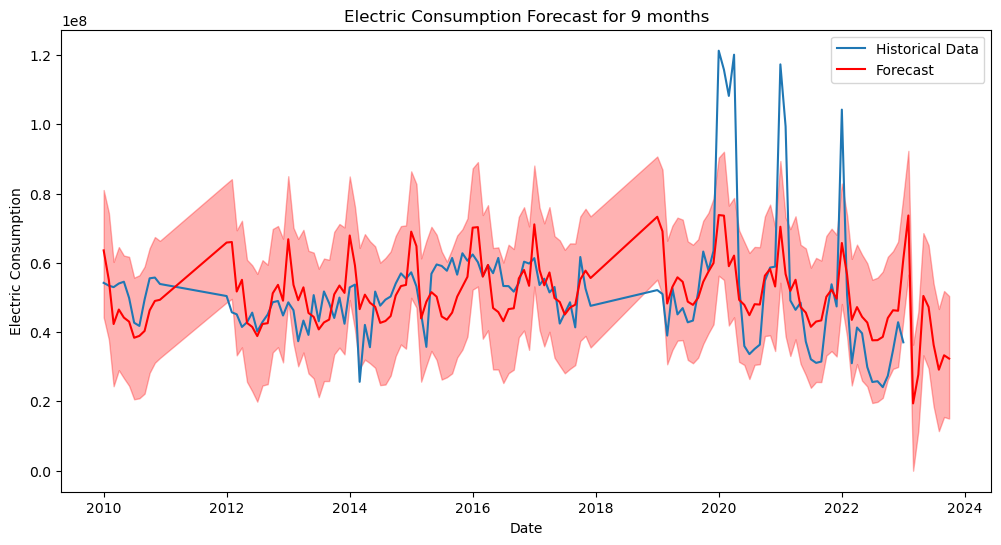

Metrics for 9 months forecast:
MAE: 13691688.213056028
MAPE: 44.931719999853215%
R²: -6.000063737791311


In [ ]:
daily_model_linear = Prophet(growth='linear', n_changepoints=10, changepoint_prior_scale=0.1)
daily_forecast_results_linear = detect_time_unit_and_forecast(daily_data, daily_model_linear, growth_type='linear')


In [ ]:
# Print each forecast with nicely formatted names
for period, forecast_df in daily_forecast_results_linear.items():
    print(f"\n{period}:")
    print(forecast_df.tail(5))  # Print only the first few rows for brevity


Forecast for 1 months:
            ds          yhat    yhat_lower    yhat_upper
133 2023-01-31  7.365379e+07  5.657864e+07  9.143977e+07

Forecast for 6 months:
            ds          yhat    yhat_lower    yhat_upper
134 2023-02-28  1.941041e+07  1.818241e+06  3.720166e+07
135 2023-03-31  2.771595e+07  1.013801e+07  4.583529e+07
136 2023-04-30  5.043398e+07  3.272837e+07  6.778776e+07
137 2023-05-31  4.723324e+07  2.985317e+07  6.517704e+07
138 2023-06-30  3.630852e+07  1.825376e+07  5.330506e+07

Forecast for 9 months:
            ds          yhat    yhat_lower    yhat_upper
137 2023-05-31  4.723324e+07  2.880466e+07  6.494865e+07
138 2023-06-30  3.630852e+07  1.816489e+07  5.305758e+07
139 2023-07-31  2.914114e+07  1.102345e+07  4.671912e+07
140 2023-08-31  3.330955e+07  1.605698e+07  5.165398e+07
141 2023-09-30  3.234239e+07  1.440838e+07  4.967181e+07


12:50:29 - cmdstanpy - INFO - Chain [1] start processing
12:50:29 - cmdstanpy - INFO - Chain [1] done processing


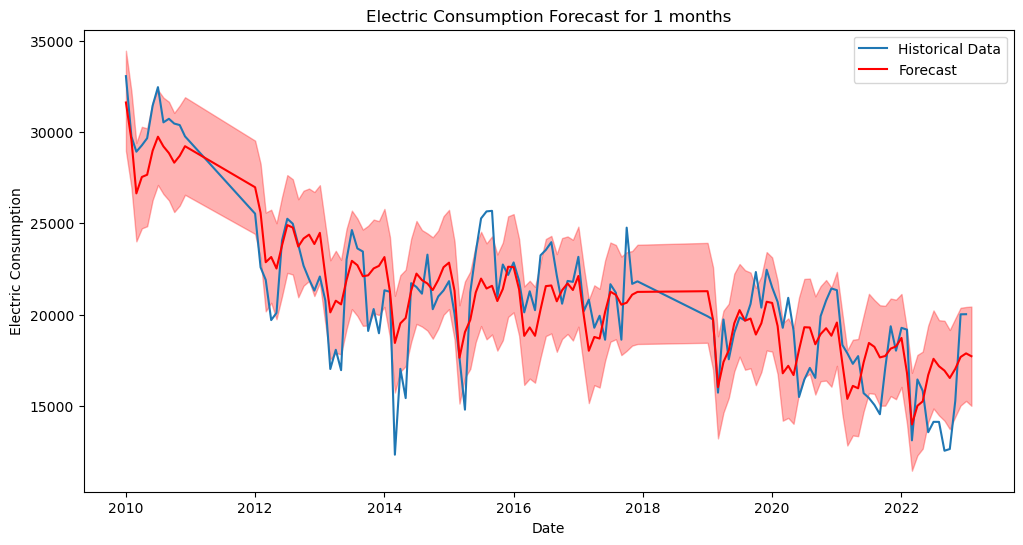

C:\Users\vishn\anaconda3\New folder\23\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Metrics for 1 months forecast:
MAE: 2302.5004763854704
MAPE: 11.500272619042446%
R²: nan


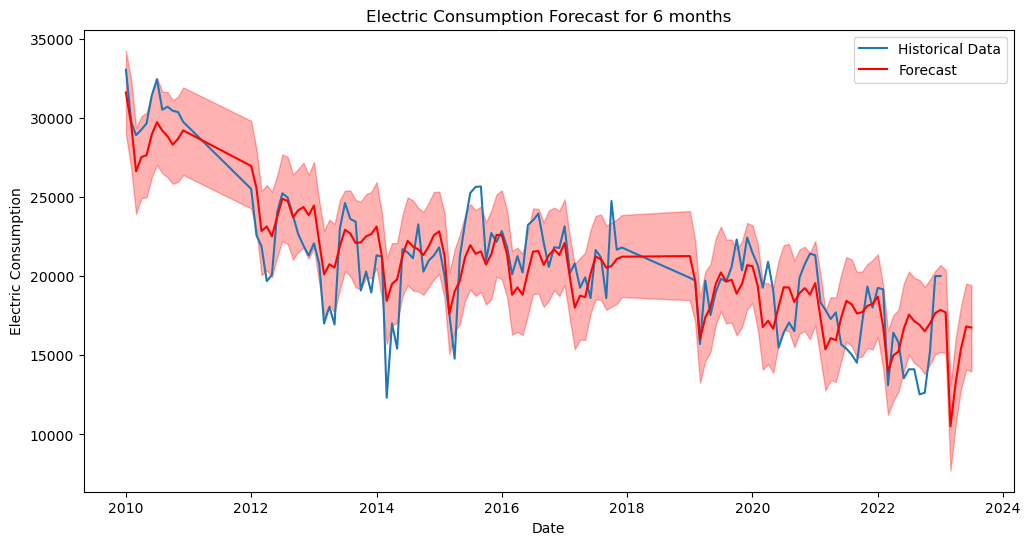

Metrics for 6 months forecast:
MAE: 2147.3971413786116
MAPE: 13.352312721984202%
R²: 0.3547237737601058


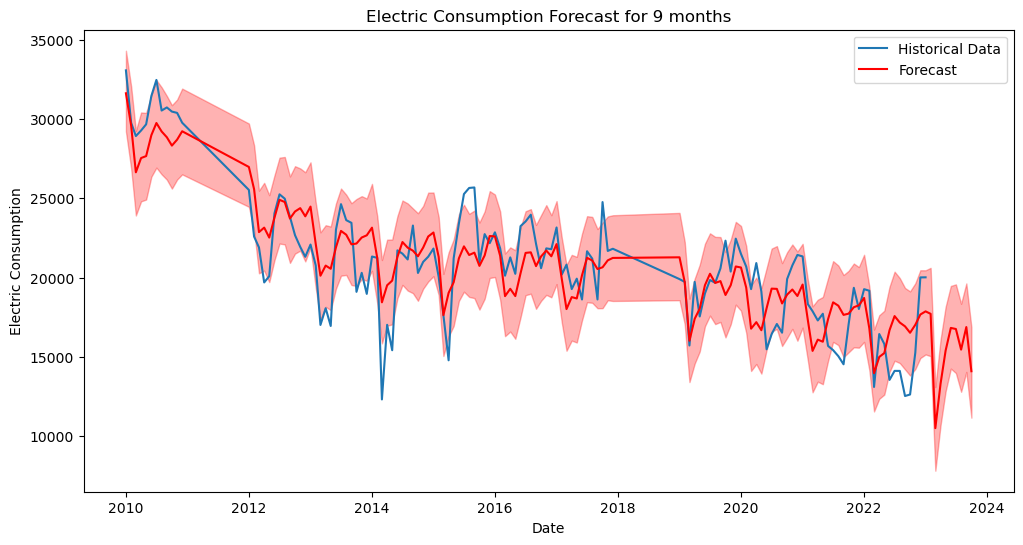

Metrics for 9 months forecast:
MAE: 2744.86244613728
MAPE: 18.078585198140463%
R²: -0.46184438402056416


In [ ]:
# Monthly forecast with linear growth model
monthly_model_linear = Prophet(growth='linear', n_changepoints=25, changepoint_prior_scale=0.05)
monthly_forecast_results_linear = detect_time_unit_and_forecast(monthly_data, monthly_model_linear, growth_type='linear')


In [ ]:
# Print each forecast with nicely formatted names
for period, forecast_df in monthly_forecast_results_linear.items():
    print(f"\n{period}:")
    print(forecast_df.head(20))  # Print only the first few rows for brevity


Forecast for 1 months:
            ds          yhat   yhat_lower    yhat_upper
133 2023-01-31  17718.768172  15000.80231  20439.399314

Forecast for 6 months:
            ds          yhat    yhat_lower    yhat_upper
133 2023-01-31  17718.768172  15149.645503  20404.813669
134 2023-02-28  10509.912197   7703.668699  13094.663230
135 2023-03-31  13311.691159  10665.520679  16112.502234
136 2023-04-30  15399.957738  12834.846915  18077.128931
137 2023-05-31  16829.935689  14113.197948  19540.278490
138 2023-06-30  16762.024577  13987.327956  19444.164684

Forecast for 9 months:
            ds          yhat    yhat_lower    yhat_upper
133 2023-01-31  17718.768172  15049.240593  20616.976801
134 2023-02-28  10509.912197   7824.915704  13098.104545
135 2023-03-31  13311.691159  10699.391719  16093.872413
136 2023-04-30  15399.957738  12831.572664  18153.233811
137 2023-05-31  16829.935689  14262.311269  19477.569425
138 2023-06-30  16762.024577  13984.404037  19576.060857
139 2023-07-31  15

12:51:57 - cmdstanpy - INFO - Chain [1] start processing
12:51:57 - cmdstanpy - INFO - Chain [1] done processing


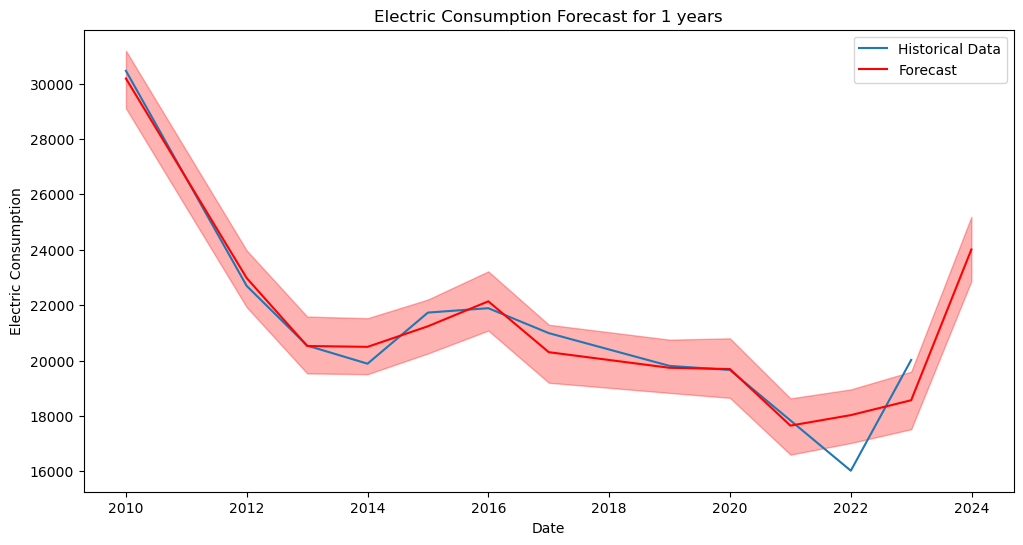

C:\Users\vishn\anaconda3\New folder\23\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Metrics for 1 years forecast:
MAE: 3989.0933682449686
MAPE: 19.924278717044313%
R²: nan


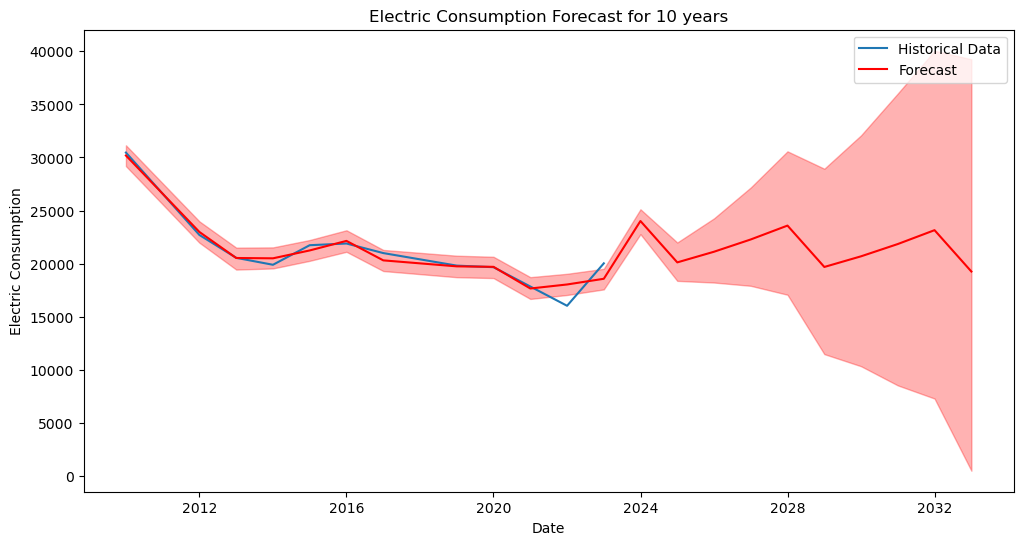

Metrics for 10 years forecast:
MAE: 2034.035064270475
MAPE: 11.160264138055927%
R²: -2.108348447501649


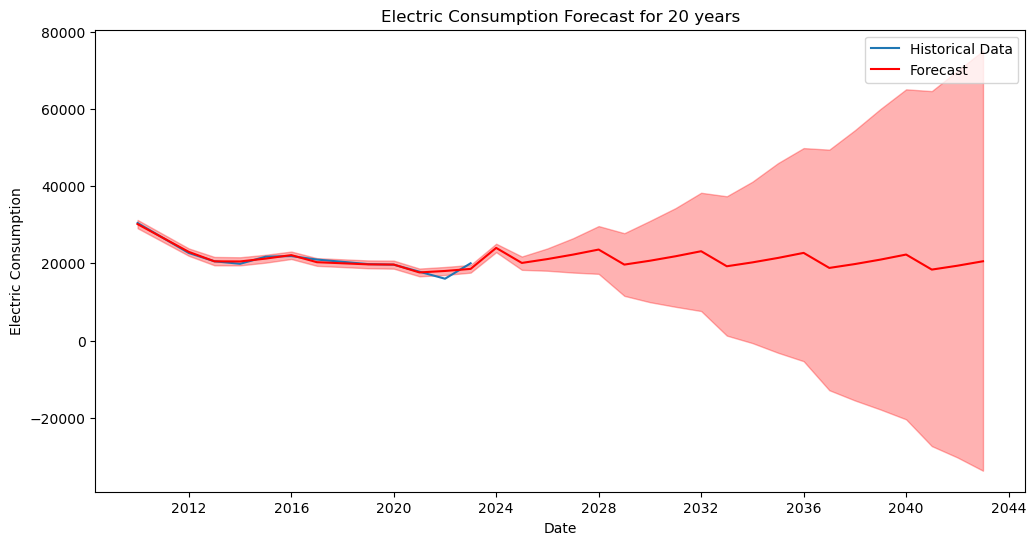

Not enough historical data to calculate metrics for 20 years forecast.


In [ ]:
# Yearly forecast with linear growth model
yearly_model_linear = Prophet(growth='linear', n_changepoints=25, changepoint_prior_scale=0.5)
yearly_forecast_results_linear = detect_time_unit_and_forecast(yearly_data, yearly_model_linear, growth_type='linear')

In [ ]:
# Print each forecast with nicely formatted names
for period, forecast_df in yearly_forecast_results_linear.items():
    print(f"\n{period}:")
    print(forecast_df.head(20))  # Print only the first few rows for brevity


Forecast for 1 years:
           ds          yhat    yhat_lower    yhat_upper
12 2023-12-31  24010.362017  22867.129948  25191.315254

Forecast for 10 years:
           ds          yhat    yhat_lower    yhat_upper
12 2023-12-31  24010.362017  22771.467397  25116.949942
13 2024-12-31  20111.140324  18369.383705  21986.647758
14 2025-12-31  21115.499757  18212.550136  24260.438546
15 2026-12-31  22272.196528  17903.506990  27170.993226
16 2027-12-31  23579.105199  17061.733755  30575.921114
17 2028-12-31  19679.883505  11465.969962  28938.056670
18 2029-12-31  20684.242939  10324.274181  32087.938159
19 2030-12-31  21840.939710   8518.537633  36028.031519
20 2031-12-31  23147.848381   7279.014586  40059.579579
21 2032-12-31  19248.626687    476.636931  39254.551393

Forecast for 20 years:
           ds          yhat    yhat_lower    yhat_upper
12 2023-12-31  24010.362017  22899.231964  25093.587827
13 2024-12-31  20111.140324  18323.522570  21776.900876
14 2025-12-31  21115.499757  1808

Forecasting for BRONX


14:44:30 - cmdstanpy - INFO - Chain [1] start processing
14:44:30 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

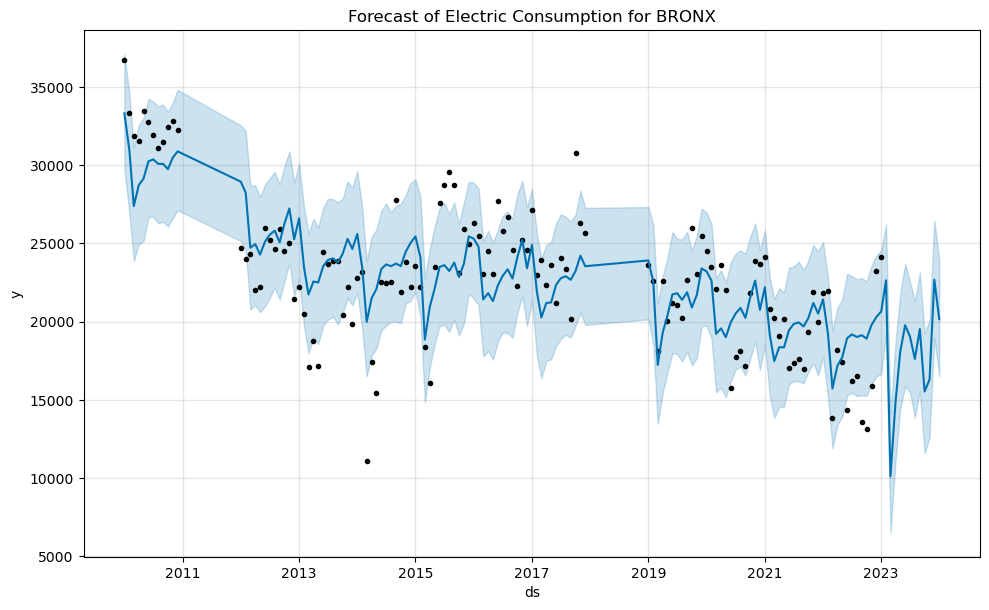

Forecasting for BROOKLYN


14:44:31 - cmdstanpy - INFO - Chain [1] start processing
14:44:31 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

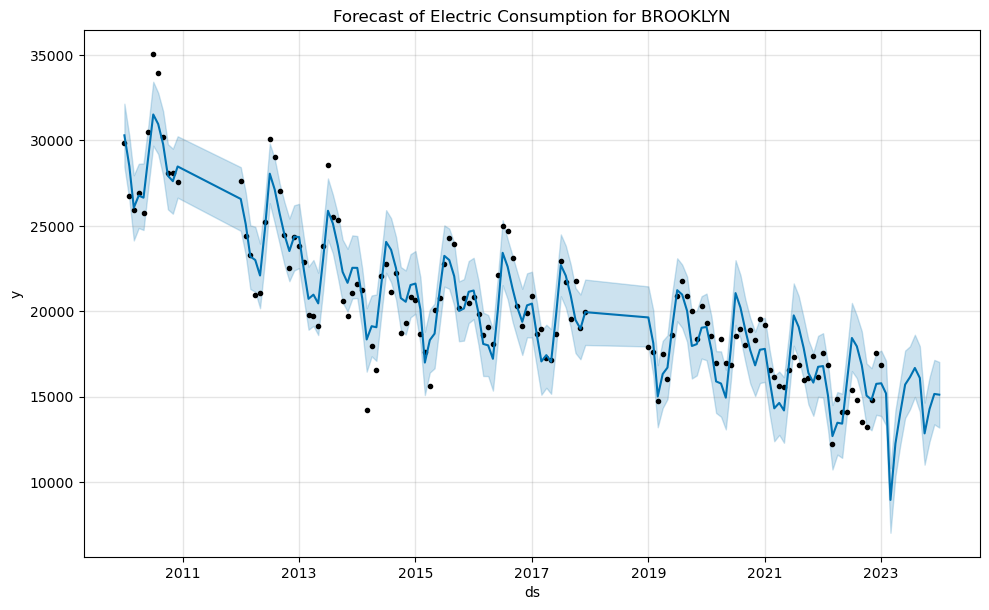

Forecasting for MANHATTAN


14:44:31 - cmdstanpy - INFO - Chain [1] start processing
14:44:31 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

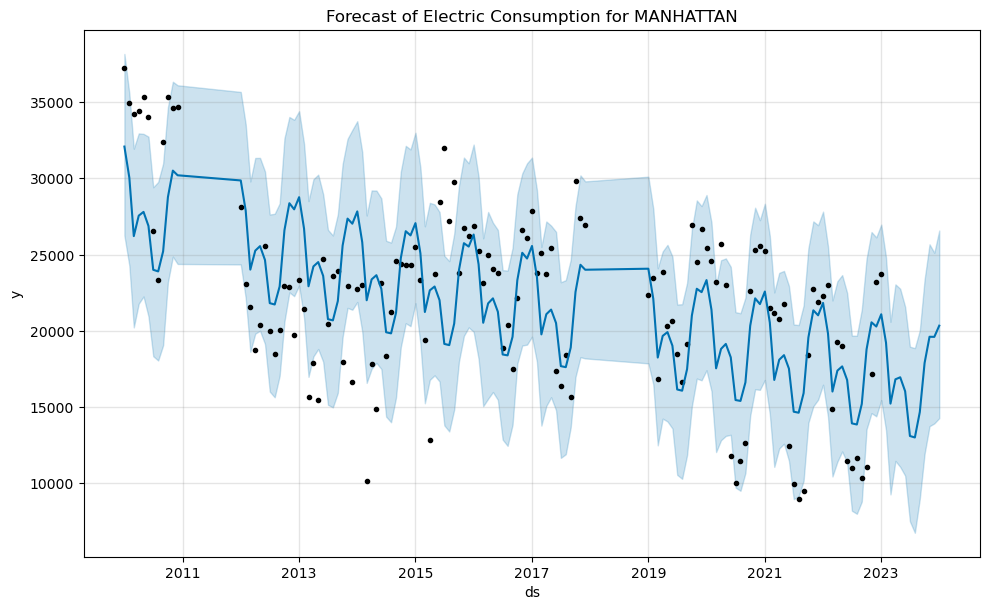

Forecasting for QUEENS


14:44:32 - cmdstanpy - INFO - Chain [1] start processing
14:44:32 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

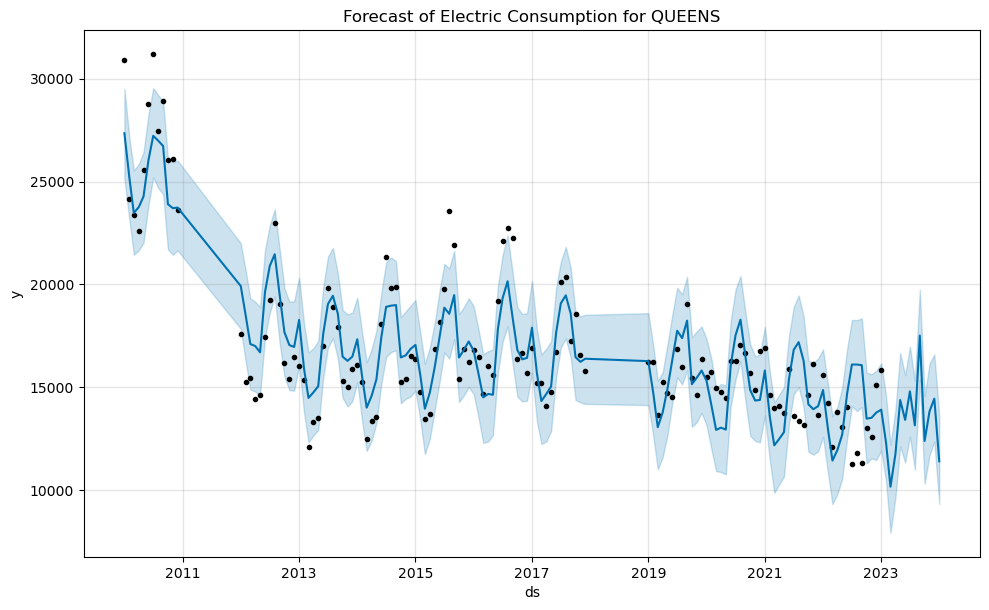

Forecasting for STATEN ISLAND


14:44:33 - cmdstanpy - INFO - Chain [1] start processing
14:44:33 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

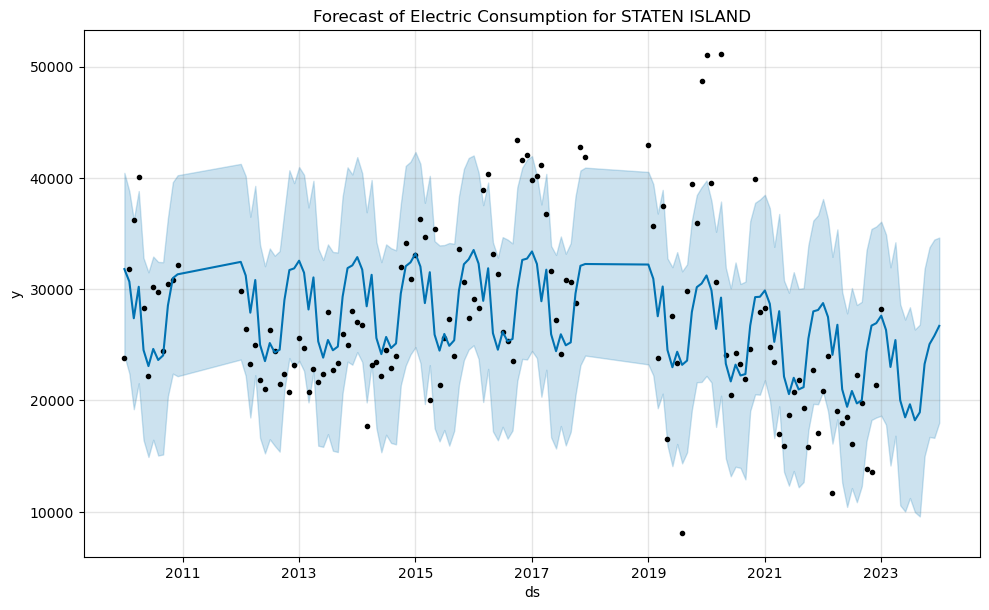

Forecasting for FHA


14:44:33 - cmdstanpy - INFO - Chain [1] start processing
14:44:33 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

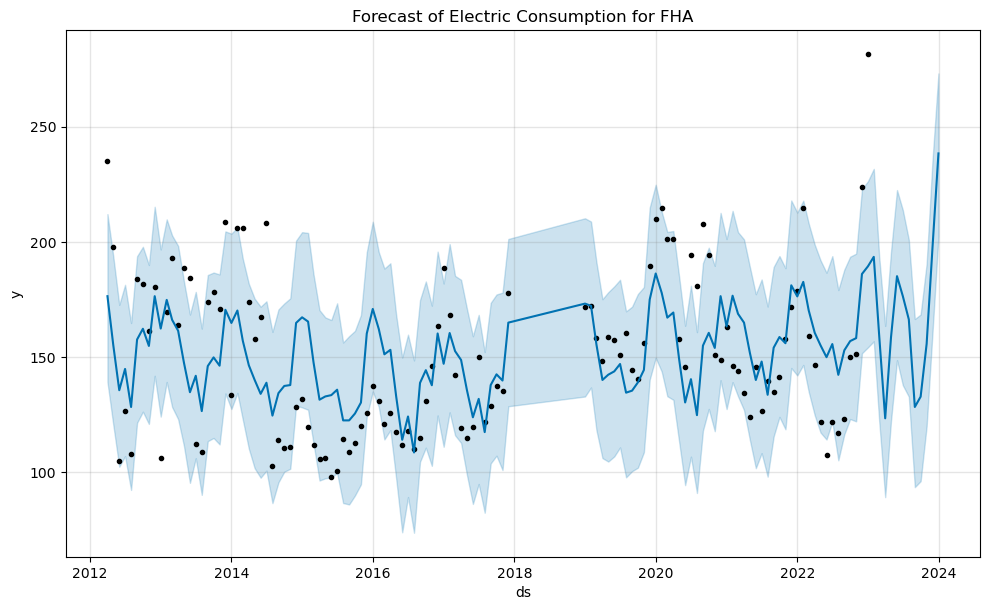

In [ ]:
# Prepare data by borough
boroughs = data['Borough'].unique()
forecast_results = {}

for borough in boroughs:
    print(f"Forecasting for {borough}")
    # Filter data for the current borough
    borough_data = data[data['Borough'] == borough]

    # Aggregate monthly data
    monthly_data = borough_data.groupby(borough_data['Revenue Month'].dt.to_period('M'))['Consumption (KWH)'].mean().reset_index()
    monthly_data['Revenue Month'] = monthly_data['Revenue Month'].dt.to_timestamp()
    monthly_data.rename(columns={'Revenue Month': 'ds', 'Consumption (KWH)': 'y'}, inplace=True)

    if not monthly_data.empty:
        # Initialize and fit the Prophet model
        model = Prophet()
        model.fit(monthly_data)

        # Make a future dataframe for next 12 months
        future = model.make_future_dataframe(periods=12, freq='M')

        # Predict
        forecast = model.predict(future)

        # Plotting the forecast
        plt.figure(figsize=(10, 6))
        model.plot(forecast)
        plt.title(f"Forecast of Electric Consumption for {borough}")
        plt.show()

        # Store results
        forecast_results[borough] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    else:
        print(f"No data available to forecast for {borough}")


# Conclusion:

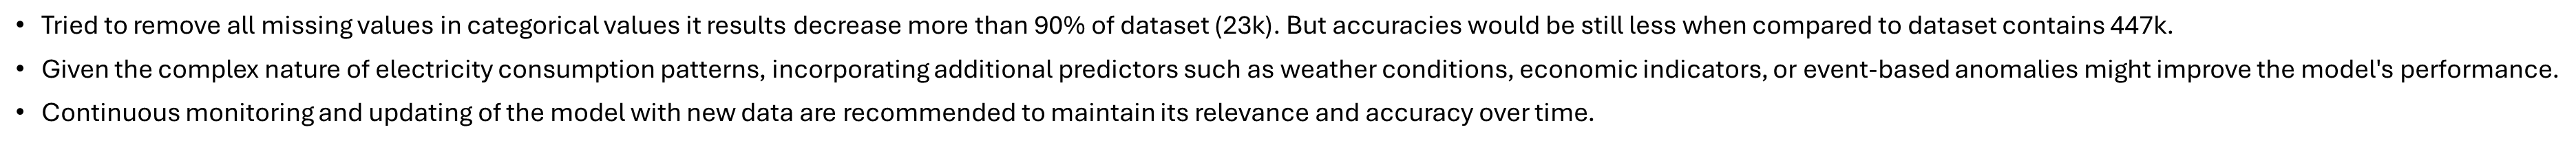